Se generará el informe.


/Users/computingvictor/Documents/Workspace/hackathon-caixabank-data-ai-report/src/agent/agent.py:156: LangChainDeprecationWarning: The method `BaseChatModel.predict` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use :meth:`~invoke` instead.
  report_content = model.predict(prompt)


Informe generado en: reports/reporte_cliente_37_20100101_20231231.pdf


{'start_date': '2010-01-01',
 'end_date': '2023-12-31',
 'client_id': 37,
 'create_report': True}

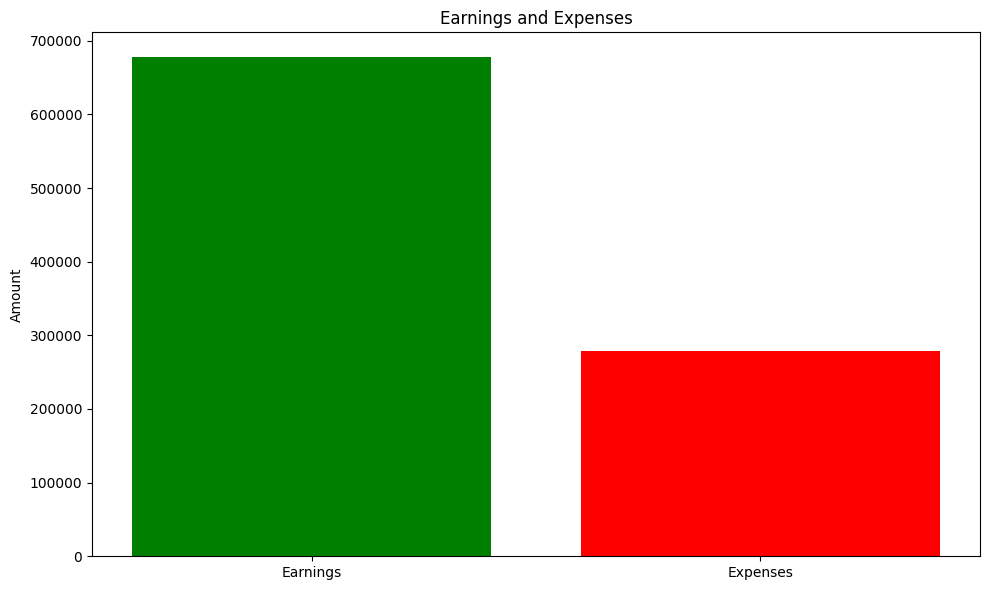

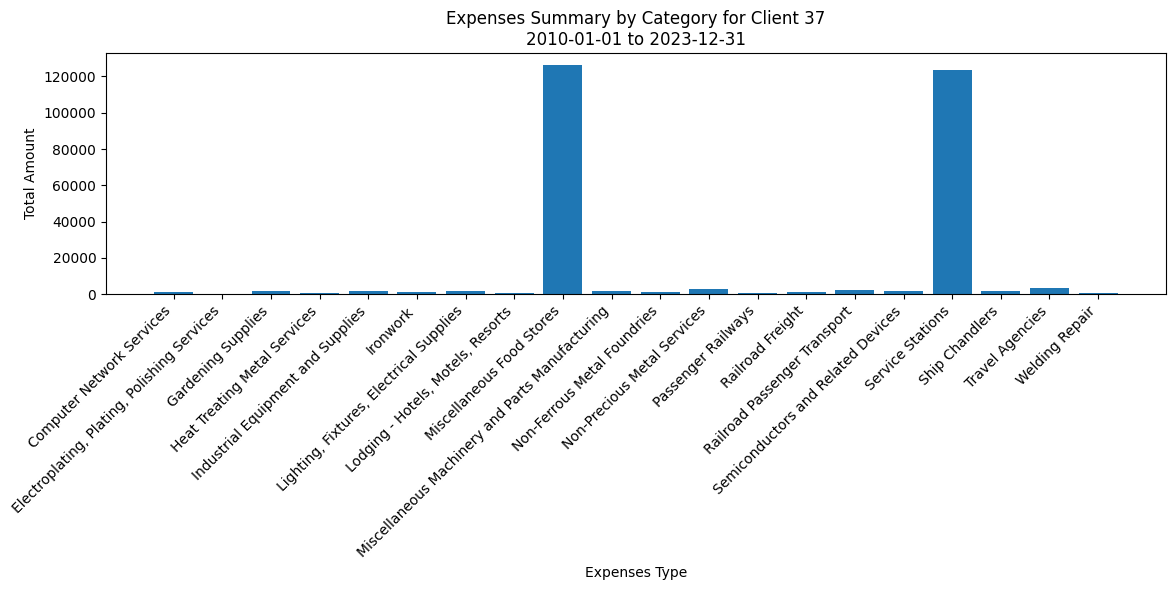

In [1]:
from src.agent.agent import *
import pandas as pd
transactions_df = pd.read_csv('data/raw/transactions_data.csv', parse_dates=['date'])

run_agent(transactions_df, 37, "Generate a report from 2010-01-01 to 2023-12-31")

In [1]:
import re
from datetime import datetime
import pandas as pd
from fpdf import FPDF
from langchain_ollama import ChatOllama

def extract_dates(prompt):
    """Extrae fechas de inicio y fin del prompt en formato 'YYYY-MM-DD' o meses ordinales."""
    
    # Manejar casos como "cuarto mes de 2017"
    month_mapping = {
        "primer": 1,
        "segundo": 2,
        "tercer": 3,
        "cuarto": 4,
        "quinto": 5,
        "sexto": 6,
        "séptimo": 7,
        "octavo": 8,
        "noveno": 9,
        "décimo": 10,
        "undécimo": 11,
        "duodécimo": 12,
    }

    # Comprobar si hay un mes ordinal en el prompt
    for month_name, month_num in month_mapping.items():
        if month_name in prompt:
            year_match = re.search(r"\d{4}", prompt)
            if year_match:
                year = int(year_match.group())
                start_date = datetime(year=year, month=month_num, day=1)
                end_date = datetime(year=year, month=month_num, day=31)  # Cambiar a día 30 o 28 según el mes
                if month_num in [4, 6, 9, 11]:  # Meses con 30 días
                    end_date = datetime(year=year, month=month_num, day=30)
                elif month_num == 2:  # Febrero (suponiendo no bisiesto)
                    end_date = datetime(year=year, month=month_num, day=28)
                return start_date, end_date

    # Manejar fechas en formato YYYY-MM-DD
    date_pattern = r"(\d{4}-\d{2}-\d{2})"
    dates = re.findall(date_pattern, prompt)
    if len(dates) == 2:
        start_date = datetime.strptime(dates[0], "%Y-%m-%d")
        end_date = datetime.strptime(dates[1], "%Y-%m-%d")
        return start_date, end_date

    return None, None

def run_agent(df: pd.DataFrame, client_id: int, input: str) -> dict:
    """
    AI Agent que genera informes en PDF usando las funciones de Task 2 si hay datos válidos
    para el client_id y rango de fechas especificado en el prompt de entrada.

    Parámetros
    ----------
    df : pandas DataFrame
        DataFrame de los datos.
    client_id : int
        ID del cliente solicitante.
    input : str
        Input del cliente con el prompt de creación del informe.

    Returns
    -------
    variables_dict : dict
        Diccionario de variables:
            {
                "start_date": "YYYY-MM-DD",
                "end_date" : "YYYY-MM-DD",
                "client_id": int,
                "create_report" : bool
            }
    """
    
    # Extraer fechas desde el input
    start_date, end_date = extract_dates(input)
    if not start_date or not end_date:
        raise ValueError("Fechas no válidas en el prompt.")
    
    # Filtrar datos del cliente y rango de fechas
    df_client = df[(df['client_id'] == client_id) &
                   (df['date'] >= start_date) &
                   (df['date'] <= end_date)]
    
    # Validar si existen datos para generar el informe
    create_report = not df_client.empty
    report_content = ""

    if create_report:
        # Generar contenido del informe con el modelo
        prompt = (
            f"Cliente {client_id} solicita un informe detallado sobre datos financieros "
            f"y de transacciones relevantes entre {start_date.strftime('%Y-%m-%d')} "
            f"y {end_date.strftime('%Y-%m-%d')}."
        )
        report_content = model.predict(prompt)

        # Crear y guardar el PDF
        pdf_path = create_pdf_report(client_id, start_date, end_date, report_content)
        print(f"Informe generado en: {pdf_path}")
    
    # Diccionario de salida
    variables_dict = {
        "start_date": start_date.strftime("%Y-%m-%d"),
        "end_date": end_date.strftime("%Y-%m-%d"),
        "client_id": client_id,
        "create_report": create_report,
    }
    
    return variables_dict

In [2]:
transaction_df = pd.read_csv("/Users/computingvictor/Documents/Workspace/hackathon-caixabank-data-ai-report/data/raw/transactions_data.csv", parse_dates=["date"])

In [16]:
run_agent(transaction_df, 598, "Informe del Cliente entre 2010-01-01 y 2022-01-31.")

Informe generado en: reports/reporte_cliente_598_2010-01-01 00:00:00_2022-01-31 00:00:00.pdf


/var/folders/w8/h7t8ndx51cs_sg9y_9cy9vd00000gn/T/ipykernel_52425/2829269306.py:21: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  pdf.set_font("Arial", size=12)
/var/folders/w8/h7t8ndx51cs_sg9y_9cy9vd00000gn/T/ipykernel_52425/2829269306.py:23: DeprecationWarning: The parameter "txt" has been renamed to "text" in 2.7.6
  pdf.cell(200, 10, txt=f"Informe del Cliente {client_id}", ln=True, align='C')
/var/folders/w8/h7t8ndx51cs_sg9y_9cy9vd00000gn/T/ipykernel_52425/2829269306.py:23: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=True use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  pdf.cell(200, 10, txt=f"Informe del Cliente {client_id}", ln=True, align='C')
/var/folders/w8/h7t8ndx51cs_sg9y_9cy9vd00000gn/T/ipykernel_52425/2829269306.py:24: DeprecationWarning: The parameter "txt" has been renamed to "text" in 2.7.6
  pdf.cell(200, 10, txt=f"Rango de fechas: {start_date} a {end_date}"

{'start_date': '2010-01-01',
 'end_date': '2022-01-31',
 'client_id': 598,
 'create_report': True}

In [23]:
import os
import pandas as pd
import shutil

current_folder = "hackathon-caixabank-data-ai-report"
parent_folder = os.path.dirname(current_folder)
report_folder = os.path.join(parent_folder, "reports")
data_folder = os.path.join(parent_folder, "data")
sample_data = pd.read_csv(
    f"{data_folder}/raw/transactions_data.csv", parse_dates=["date"]
)


def delete_reports():
    if os.path.exists(report_folder):
        shutil.rmtree(report_folder)
    os.mkdir("reports")
    os.mkdir("reports/figures")


def check_all_values(expected_dict, submitted_dict):
    for k in expected_dict:
        if k not in submitted_dict or expected_dict[k] != submitted_dict[k]:
            return False
    return True


def test_agent_1():
    delete_reports()
    input = "Create a pdf report for the fourth month of 2017"
    client_id = 122
    output = {
        "start_date": "2017-04-01",
        "end_date": "2017-04-30",
        "client_id": client_id,
        "create_report": True,
    }
    try:
        submitted_output = run_agent(
            input=input,
            client_id=client_id,
            df=sample_data.copy(deep=True),
        )
    except Exception as e:
        print(e)
        submitted_output = {}

    test_passed = check_all_values(output, submitted_output)
    expected_length = 1 if output["create_report"] else 0
    try:
        pdf_files = [
            file for file in os.listdir(report_folder) if file.endswith(".pdf")
        ]
        condition_pdf = len(pdf_files) == expected_length
    except Exception as e:
        print(e)
        condition_pdf = False
    assert condition_pdf and test_passed


def test_agent_2():
    delete_reports()
    input = "Create a pdf report from 2018-01-01 to 2018-05-31"
    client_id = 1352
    output = {
        "start_date": "2018-01-01",
        "end_date": "2018-05-31",
        "client_id": client_id,
        "create_report": True,
    }
    try:
        submitted_output = run_agent(
            input=input,
            client_id=client_id,
            df=sample_data.copy(deep=True),
        )
    except Exception as e:
        print(e)
        submitted_output = {}

    test_passed = check_all_values(output, submitted_output)
    expected_length = 1 if output["create_report"] else 0
    try:
        pdf_files = [
            file for file in os.listdir(report_folder) if file.endswith(".pdf")
        ]
        condition_pdf = len(pdf_files) == expected_length
    except Exception as e:
        print(e)
        condition_pdf = False
    assert condition_pdf and test_passed


def test_agent_3():
    delete_reports()
    input = "Create a pdf report from 2018-01-01 to 2018-05-31"
    client_id = 7000
    output = {
        "start_date": "2018-01-01",
        "end_date": "2018-05-31",
        "client_id": client_id,
        "create_report": False,
    }
    try:
        submitted_output = run_agent(
            input=input,
            client_id=client_id,
            df=sample_data.copy(deep=True),
        )
    except Exception as e:
        print(e)
        submitted_output = {}

    test_passed = check_all_values(output, submitted_output)
    expected_length = 1 if output["create_report"] else 0
    try:
        pdf_files = [
            file for file in os.listdir(report_folder) if file.endswith(".pdf")
        ]
        condition_pdf = len(pdf_files) == expected_length
    except Exception as e:
        print(e)
        condition_pdf = False
    assert condition_pdf and test_passed


In [56]:
import os
import re
from datetime import datetime
import pandas as pd
from fpdf import FPDF
from langchain_ollama import ChatOllama

import re
from datetime import datetime

def extract_dates(prompt):
    """Extract start and end dates from the prompt in 'YYYY-MM-DD' format."""
    
    # Month mappings for Spanish and English
    month_mapping = {
        "primer": 1, "first": 1,
        "segundo": 2, "second": 2,
        "tercer": 3, "third": 3,
        "cuarto": 4, "fourth": 4,
        "quinto": 5, "fifth": 5,
        "sexto": 6, "sixth": 6,
        "séptimo": 7, "seventh": 7,
        "octavo": 8, "eighth": 8,
        "noveno": 9, "ninth": 9,
        "décimo": 10, "tenth": 10,
        "undécimo": 11, "eleventh": 11,
        "duodécimo": 12, "twelfth": 12,
    }

    # Check for ordinal months in the prompt
    for month_name, month_num in month_mapping.items():
        if month_name in prompt:
            year_match = re.search(r"\d{4}", prompt)
            if year_match:
                year = int(year_match.group())
                start_date = datetime(year=year, month=month_num, day=1)

                # Adjust the end date based on the month
                if month_num == 2:  # February
                    end_date = datetime(year=year, month=month_num, day=28)  # Assuming not a leap year
                elif month_num in [4, 6, 9, 11]:  # Months with 30 days
                    end_date = datetime(year=year, month=month_num, day=30)
                else:  # Months with 31 days
                    end_date = datetime(year=year, month=month_num, day=31)
                
                return start_date, end_date

    # Handle dates in YYYY-MM-DD format
    date_pattern = r"(\d{4}-\d{2}-\d{2})"
    dates = re.findall(date_pattern, prompt)
    if len(dates) == 2:
        start_date = datetime.strptime(dates[0], "%Y-%m-%d")
        end_date = datetime.strptime(dates[1], "%Y-%m-%d")
        return start_date, end_date

    return None, None

def create_pdf_report(client_id, start_date, end_date, report_content, output_folder="reports/"):
    """Crea un informe en PDF y lo guarda en la carpeta especificada."""
    pdf = FPDF()
    pdf.add_page()
    pdf.set_font("Arial", size=12)

    pdf.cell(200, 10, txt=f"Informe del Cliente {client_id}", ln=True, align='C')
    pdf.cell(200, 10, txt=f"Rango de fechas: {start_date.strftime('%Y-%m-%d')} a {end_date.strftime('%Y-%m-%d')}", ln=True)
    pdf.multi_cell(0, 10, report_content)

    output_path = f"{output_folder}reporte_cliente_{client_id}_{start_date.strftime('%Y%m%d')}_{end_date.strftime('%Y%m%d')}.pdf"
    
    # Crear la carpeta de salida si no existe
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    pdf.output(output_path)
    return output_path

def run_agent(df: pd.DataFrame, client_id: int, input: str) -> dict:
    """
    AI Agent que genera informes en PDF usando las funciones de Task 2 si hay datos válidos
    para el client_id y rango de fechas especificado en el prompt de entrada.

    Parámetros
    ----------
    df : pandas DataFrame
        DataFrame de los datos.
    client_id : int
        ID del cliente solicitante.
    input : str
        Input del cliente con el prompt de creación del informe.

    Returns
    -------
    variables_dict : dict
        Diccionario de variables:
            {
                "start_date": "YYYY-MM-DD",
                "end_date" : "YYYY-MM-DD",
                "client_id": int,
                "create_report" : bool
            }
    """
    # Configurar el modelo ChatOllama
    model = ChatOllama(model="llama3.2:1b", temperature=0)
    
    # Extraer fechas desde el input
    start_date, end_date = extract_dates(input)
    if not start_date or not end_date:
        raise ValueError("Fechas no válidas en el prompt.")
    
    # Filtrar datos del cliente y rango de fechas
    df_client = df[(df['client_id'] == client_id) &
                   (df['date'] >= start_date) &
                   (df['date'] <= end_date)]
    
    # Validar si existen datos para generar el informe
    # create_report = not df_client.empty
    report_content = ""


    # Generar contenido del informe con el modelo
    prompt = (
        f"Cliente {client_id} solicita un informe detallado sobre datos financieros y de transacciones "
        f"relevantes entre {start_date.strftime('%Y-%m-%d')} y {end_date.strftime('%Y-%m-%d')}. "
        "El informe debe incluir: \n"
        "- Resumen de ingresos y gastos.\n"
        "- Análisis de inversiones y pagos realizados.\n"
        "- Datos organizados por meses y totales anuales.\n"
        "- Visualizaciones de las tendencias en el tiempo.\n"
        "Asegúrate de usar todos los datos disponibles para proporcionar un resumen claro y relevante.")
    report_content = model.predict(prompt)

    # Crear y guardar el PDF
    pdf_path = create_pdf_report(client_id, start_date, end_date, report_content)
    print(f"Informe generado en: {pdf_path}")
    
    # Diccionario de salida
    variables_dict = {
        "start_date": start_date.strftime("%Y-%m-%d"),
        "end_date": end_date.strftime("%Y-%m-%d"),
        "client_id": client_id,
        "create_report": True
    }
    
    return variables_dict

In [59]:
import os
import re
from datetime import datetime
import pandas as pd
from fpdf import FPDF
from langchain_ollama import ChatOllama

def extract_dates(prompt):
    """Extract start and end dates from the prompt in 'YYYY-MM-DD' format."""
    
    # Month mappings for Spanish and English
    month_mapping = {
        "primer": 1, "first": 1,
        "segundo": 2, "second": 2,
        "tercer": 3, "third": 3,
        "cuarto": 4, "fourth": 4,
        "quinto": 5, "fifth": 5,
        "sexto": 6, "sixth": 6,
        "séptimo": 7, "seventh": 7,
        "octavo": 8, "eighth": 8,
        "noveno": 9, "ninth": 9,
        "décimo": 10, "tenth": 10,
        "undécimo": 11, "eleventh": 11,
        "duodécimo": 12, "twelfth": 12,
    }

    # Check for ordinal months in the prompt
    for month_name, month_num in month_mapping.items():
        if month_name in prompt:
            year_match = re.search(r"\d{4}", prompt)
            if year_match:
                year = int(year_match.group())
                start_date = datetime(year=year, month=month_num, day=1)

                # Adjust the end date based on the month
                if month_num == 2:  # February
                    end_date = datetime(year=year, month=month_num, day=28)  # Assuming not a leap year
                elif month_num in [4, 6, 9, 11]:  # Months with 30 days
                    end_date = datetime(year=year, month=month_num, day=30)
                else:  # Months with 31 days
                    end_date = datetime(year=year, month=month_num, day=31)
                
                return start_date, end_date

    # Handle dates in YYYY-MM-DD format
    date_pattern = r"(\d{4}-\d{2}-\d{2})"
    dates = re.findall(date_pattern, prompt)
    if len(dates) == 2:
        start_date = datetime.strptime(dates[0], "%Y-%m-%d")
        end_date = datetime.strptime(dates[1], "%Y-%m-%d")
        return start_date, end_date

    return None, None

def create_pdf_report(client_id, start_date, end_date, report_content, output_folder="reports/"):
    """Crea un informe en PDF y lo guarda en la carpeta especificada."""
    pdf = FPDF()
    pdf.add_page()
    pdf.set_font("Arial", size=12)

    pdf.cell(200, 10, txt=f"Informe del Cliente {client_id}", ln=True, align='C')
    pdf.cell(200, 10, txt=f"Rango de fechas: {start_date.strftime('%Y-%m-%d')} a {end_date.strftime('%Y-%m-%d')}", ln=True)
    pdf.multi_cell(0, 10, report_content)

    output_path = f"{output_folder}reporte_cliente_{client_id}_{start_date.strftime('%Y%m%d')}_{end_date.strftime('%Y%m%d')}.pdf"
    
    # Crear la carpeta de salida si no existe
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    pdf.output(output_path)
    return output_path

def run_agent(df: pd.DataFrame, client_id: int, input: str) -> dict:
    """
    AI Agent que genera informes en PDF usando las funciones de Task 2 si hay datos válidos
    para el client_id y rango de fechas especificado en el prompt de entrada.

    Parámetros
    ----------
    df : pandas DataFrame
        DataFrame de los datos.
    client_id : int
        ID del cliente solicitante.
    input : str
        Input del cliente con el prompt de creación del informe.

    Returns
    -------
    variables_dict : dict
        Diccionario de variables:
            {
                "start_date": "YYYY-MM-DD",
                "end_date" : "YYYY-MM-DD",
                "client_id": int,
                "create_report" : bool
            }
    """
    # Configurar el modelo ChatOllama
    model = ChatOllama(model="llama3.2:1b", temperature=0)
    
    # Extraer fechas desde el input
    start_date, end_date = extract_dates(input)
    if not start_date or not end_date:
        raise ValueError("Fechas no válidas en el prompt.")
    
    # Filtrar datos del cliente y rango de fechas
    df_client = df[(df['client_id'] == client_id) &
                   (df['date'] >= start_date) &
                   (df['date'] <= end_date)]
    
    # Validar si existen datos para generar el informe
    create_report = not df_client.empty
    report_content = ""

    if create_report:
        # Generar contenido del informe con el modelo
        prompt = (
            f"Cliente {client_id} solicita un informe detallado sobre datos financieros y de transacciones "
            f"relevantes entre {start_date.strftime('%Y-%m-%d')} y {end_date.strftime('%Y-%m-%d')}. "
            "El informe debe incluir: \n"
            "- Resumen de ingresos y gastos.\n"
            "- Análisis de inversiones y pagos realizados.\n"
            "- Datos organizados por meses y totales anuales.\n"
            "- Visualizaciones de las tendencias en el tiempo.\n"
            "Asegúrate de usar todos los datos disponibles para proporcionar un resumen claro y relevante.")
        report_content = model.predict(prompt)

        # Crear y guardar el PDF
        pdf_path = create_pdf_report(client_id, start_date, end_date, report_content)
        print(f"Informe generado en: {pdf_path}")

    # Diccionario de salida
    variables_dict = {
        "start_date": start_date.strftime("%Y-%m-%d"),
        "end_date": end_date.strftime("%Y-%m-%d"),
        "client_id": client_id,
        "create_report": create_report  # Cambiar a False si no se generó el informe
    }
    
    return variables_dict

In [65]:
transaction_df['client_id'].max()

1998

In [61]:
test_agent_1()

/var/folders/w8/h7t8ndx51cs_sg9y_9cy9vd00000gn/T/ipykernel_52425/1837963086.py:59: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  pdf.set_font("Arial", size=12)
/var/folders/w8/h7t8ndx51cs_sg9y_9cy9vd00000gn/T/ipykernel_52425/1837963086.py:61: DeprecationWarning: The parameter "txt" has been renamed to "text" in 2.7.6
  pdf.cell(200, 10, txt=f"Informe del Cliente {client_id}", ln=True, align='C')
/var/folders/w8/h7t8ndx51cs_sg9y_9cy9vd00000gn/T/ipykernel_52425/1837963086.py:61: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=True use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  pdf.cell(200, 10, txt=f"Informe del Cliente {client_id}", ln=True, align='C')
/var/folders/w8/h7t8ndx51cs_sg9y_9cy9vd00000gn/T/ipykernel_52425/1837963086.py:62: DeprecationWarning: The parameter "txt" has been renamed to "text" in 2.7.6
  pdf.cell(200, 10, txt=f"Rango de fechas: {start_date.strftime('%Y-%

Informe generado en: reports/reporte_cliente_122_20170401_20170430.pdf


In [62]:
test_agent_2()

Informe generado en: reports/reporte_cliente_1352_20180101_20180531.pdf


/var/folders/w8/h7t8ndx51cs_sg9y_9cy9vd00000gn/T/ipykernel_52425/1837963086.py:59: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  pdf.set_font("Arial", size=12)
/var/folders/w8/h7t8ndx51cs_sg9y_9cy9vd00000gn/T/ipykernel_52425/1837963086.py:61: DeprecationWarning: The parameter "txt" has been renamed to "text" in 2.7.6
  pdf.cell(200, 10, txt=f"Informe del Cliente {client_id}", ln=True, align='C')
/var/folders/w8/h7t8ndx51cs_sg9y_9cy9vd00000gn/T/ipykernel_52425/1837963086.py:61: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=True use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  pdf.cell(200, 10, txt=f"Informe del Cliente {client_id}", ln=True, align='C')
/var/folders/w8/h7t8ndx51cs_sg9y_9cy9vd00000gn/T/ipykernel_52425/1837963086.py:62: DeprecationWarning: The parameter "txt" has been renamed to "text" in 2.7.6
  pdf.cell(200, 10, txt=f"Rango de fechas: {start_date.strftime('%Y-%

In [63]:
test_agent_3()

In [27]:
run_agent(transaction_df, 598, "Informe del Cliente entre 2010-01-01 y 2022-01-31.")

Informe generado en: reports/reporte_cliente_598_20100101_20220131.pdf


/var/folders/w8/h7t8ndx51cs_sg9y_9cy9vd00000gn/T/ipykernel_52425/2316611033.py:39: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  pdf.set_font("Arial", size=12)
/var/folders/w8/h7t8ndx51cs_sg9y_9cy9vd00000gn/T/ipykernel_52425/2316611033.py:41: DeprecationWarning: The parameter "txt" has been renamed to "text" in 2.7.6
  pdf.cell(200, 10, txt=f"Informe del Cliente {client_id}", ln=True, align='C')
/var/folders/w8/h7t8ndx51cs_sg9y_9cy9vd00000gn/T/ipykernel_52425/2316611033.py:41: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=True use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  pdf.cell(200, 10, txt=f"Informe del Cliente {client_id}", ln=True, align='C')
/var/folders/w8/h7t8ndx51cs_sg9y_9cy9vd00000gn/T/ipykernel_52425/2316611033.py:42: DeprecationWarning: The parameter "txt" has been renamed to "text" in 2.7.6
  pdf.cell(200, 10, txt=f"Rango de fechas: {start_date.strftime('%Y-%

{'start_date': '2010-01-01',
 'end_date': '2022-01-31',
 'client_id': 598,
 'create_report': True}

In [60]:
def test_agent_1():
    delete_reports()
    input = "Create a pdf report for the fourth month of 2017"
    client_id = 122
    output = {
        "start_date": "2017-04-01",
        "end_date": "2017-04-30",
        "client_id": client_id,
        "create_report": True,
    }
    try:
        submitted_output = run_agent(
            input=input,
            client_id=client_id,
            df=sample_data.copy(deep=True),
        )
    except Exception as e:
        print(e)
        submitted_output = {}

    test_passed = check_all_values(output, submitted_output)
    expected_length = 1 if output["create_report"] else 0
    try:
        pdf_files = [
            file for file in os.listdir(report_folder) if file.endswith(".pdf")
        ]
        condition_pdf = len(pdf_files) == expected_length
    except Exception as e:
        print(e)
        condition_pdf = False
    assert condition_pdf and test_passed

In [54]:
run_agent(input="Create a pdf report from 2018-01-01 to 2018-05-31",client_id=7000,df=transaction_df)

Informe generado en: reports/reporte_cliente_7000_20180101_20180531.pdf


/var/folders/w8/h7t8ndx51cs_sg9y_9cy9vd00000gn/T/ipykernel_52425/61769642.py:62: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  pdf.set_font("Arial", size=12)
/var/folders/w8/h7t8ndx51cs_sg9y_9cy9vd00000gn/T/ipykernel_52425/61769642.py:64: DeprecationWarning: The parameter "txt" has been renamed to "text" in 2.7.6
  pdf.cell(200, 10, txt=f"Informe del Cliente {client_id}", ln=True, align='C')
/var/folders/w8/h7t8ndx51cs_sg9y_9cy9vd00000gn/T/ipykernel_52425/61769642.py:64: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=True use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  pdf.cell(200, 10, txt=f"Informe del Cliente {client_id}", ln=True, align='C')
/var/folders/w8/h7t8ndx51cs_sg9y_9cy9vd00000gn/T/ipykernel_52425/61769642.py:65: DeprecationWarning: The parameter "txt" has been renamed to "text" in 2.7.6
  pdf.cell(200, 10, txt=f"Rango de fechas: {start_date.strftime('%Y-%m-%d')} 

{'start_date': '2018-01-01',
 'end_date': '2018-05-31',
 'client_id': 7000,
 'create_report': True}

In [58]:
test_agent_2()

name 'model' is not defined


AssertionError: 

In [51]:
def test_agent_2():
    delete_reports()
    input = "Create a pdf report from 2018-01-01 to 2018-05-31"
    client_id = 1352
    output = {
        "start_date": "2018-01-01",
        "end_date": "2018-05-31",
        "client_id": client_id,
        "create_report": True,
    }
    try:
        submitted_output = run_agent(
            input=input,
            client_id=client_id,
            df=sample_data.copy(deep=True),
        )
    except Exception as e:
        print(e)
        submitted_output = {}

    test_passed = check_all_values(output, submitted_output)
    expected_length = 1 if output["create_report"] else 0
    try:
        pdf_files = [
            file for file in os.listdir(report_folder) if file.endswith(".pdf")
        ]
        condition_pdf = len(pdf_files) == expected_length
    except Exception as e:
        print(e)
        condition_pdf = False
    assert condition_pdf and test_passed


def test_agent_3():
    delete_reports()
    input = "Create a pdf report from 2018-01-01 to 2018-05-31"
    client_id = 7000
    output = {
        "start_date": "2018-01-01",
        "end_date": "2018-05-31",
        "client_id": client_id,
        "create_report": False,
    }
    try:
        submitted_output = run_agent(
            input=input,
            client_id=client_id,
            df=sample_data.copy(deep=True),
        )
    except Exception as e:
        print(e)
        submitted_output = {}

    test_passed = check_all_values(output, submitted_output)
    expected_length = 1 if output["create_report"] else 0
    try:
        pdf_files = [
            file for file in os.listdir(report_folder) if file.endswith(".pdf")
        ]
        condition_pdf = len(pdf_files) == expected_length
    except Exception as e:
        print(e)
        condition_pdf = False
    assert condition_pdf and test_passed

Test Funcion tercera

In [5]:
import pandas as pd
df_test= pd.read_csv("../../data/raw/transactions_data.csv", parse_dates=["date"])

In [ ]:
def cash_flow_summary(
    df: pd.DataFrame, client_id: int, start_date: str, end_date: str
) -> pd.DataFrame:
    """
    For the period defined by start_date and end_date (both inclusive), retrieve the available client data and return a Pandas DataFrame containing cash flow information.

    If the period exceeds 60 days, group the data by month, using the end of each month for the date. If the period is 60 days or shorter, group the data by week.

        The expected columns are:
            - Date --> the date for the period. YYYY-MM if period larger than 60 days, YYYY-MM-DD otherwise.
            - Inflows --> the sum of the earnings (positive amounts)
            - Outflows --> the sum of the expenses (absolute values of the negative amounts)
            - Net Cash Flow --> Inflows - Outflows
            - % Savings --> Percentage of Net Cash Flow / Inflows

        The DataFrame should be sorted by ascending date and values rounded to 2 decimals. The columns should be in the given order.

        Parameters
        ----------
        df : pandas DataFrame
           DataFrame  of the data to be used for the agent.
        client_id : int
            Id of the client.
        start_date : str
            Start date for the date period. In the format "YYYY-MM-DD".
        end_date : str
            End date for the date period. In the format "YYYY-MM-DD".


        Returns
        -------
        Pandas Dataframe with the cash flow summary.

    """

In [28]:
start_date= "2013-01-01"
end_date= "2013-02-28"
client_id= 126

In [40]:
df= df_test.copy()
df

# Filter df by client_id and date period.
df = df[(df["client_id"] == client_id) & (df["date"] >= start_date) & (df["date"] <= end_date)]

# Convert start and end dates to datetime objects.
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

# Calcula la diferencia de dias entre las fechas.
period_days = (end_date - start_date).days

# Agrupa los datos por mes si el periodo es mayor a 60 dias, de lo contrario agrupa por semana.
if period_days > 60:
    df["date"] = df["date"].dt.to_period("M").dt.to_timestamp('M')
    # Quitar los dias de la fecha.
    df["date"] = df["date"].dt.strftime("%Y-%m")
else:
    df["date"] = df["date"].dt.to_period("W").dt.to_timestamp('W')
    df["date"] = df["date"].dt.strftime("%Y-%m-%d")
# Conevrt amount to numeric.
df['amount'] = df['amount'].str.replace('$', '', regex=False)
df['amount'] = pd.to_numeric(df['amount'], errors='coerce')

# Create a column earnings if the amount is positive, otherwise expenses.
df["Inflows"] = df["amount"].apply(lambda x: x if x > 0 else 0)
df["Outflows"] = df["amount"].apply(lambda x: abs(x) if x < 0 else 0)

# Group by date and create Net Cash Flow.
df = df.groupby("date").agg(
    Inflows=("Inflows", "sum"),
    Outflows=("Outflows", "sum")
).reset_index()

df["Net Cash Flow"] = df["Inflows"] - df["Outflows"]

# Calculate % Savings.
df["% Savings"] = (df["Net Cash Flow"] / df["Inflows"]) * 100

# Round values to 2 decimals.
df = df.round(2)

# Ascending sort by date.
df = df.sort_values("date")

# Rename date for Date.
df.rename(columns={"date": "Date"}, inplace=True)

df

,Date,Inflows,Outflows,Net Cash Flow,% Savings
0,2013-01-06,432.74,129.0,303.74,70.19
1,2013-01-13,518.67,0.0,518.67,100.00
2,2013-01-20,297.63,66.0,231.63,77.82
3,2013-01-27,450.91,0.0,450.91,100.00
4,2013-02-03,863.16,156.0,707.16,81.93
5,2013-02-10,288.75,0.0,288.75,100.00
6,2013-02-17,466.82,0.0,466.82,100.00
7,2013-02-24,1019.02,71.0,948.02,93.03
8,2013-03-03,138.35,0.0,138.35,100.00


In [41]:
def cash_flow_summary(
    df: pd.DataFrame, client_id: int, start_date: str, end_date: str
) -> pd.DataFrame:
    """
    For the period defined by start_date and end_date (both inclusive), retrieve the available client data and return a Pandas DataFrame containing cash flow information.

    If the period exceeds 60 days, group the data by month, using the end of each month for the date. If the period is 60 days or shorter, group the data by week.

        The expected columns are:
            - Date --> the date for the period. YYYY-MM if period larger than 60 days, YYYY-MM-DD otherwise.
            - Inflows --> the sum of the earnings (positive amounts)
            - Outflows --> the sum of the expenses (absolute values of the negative amounts)
            - Net Cash Flow --> Inflows - Outflows
            - % Savings --> Percentage of Net Cash Flow / Inflows

        The DataFrame should be sorted by ascending date and values rounded to 2 decimals. The columns should be in the given order.

        Parameters
        ----------
        df : pandas DataFrame
           DataFrame  of the data to be used for the agent.
        client_id : int
            Id of the client.
        start_date : str
            Start date for the date period. In the format "YYYY-MM-DD".
        end_date : str
            End date for the date period. In the format "YYYY-MM-DD".


        Returns
        -------
        Pandas Dataframe with the cash flow summary.

    """

    df= df.copy()

    # Filter df by client_id and date period.
    df = df[(df["client_id"] == client_id) & (df["date"] >= start_date) & (df["date"] <= end_date)]

    # Convert start and end dates to datetime objects.
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)

    # Calcula la diferencia de dias entre las fechas.
    period_days = (end_date - start_date).days

    # Agrupa los datos por mes si el periodo es mayor a 60 dias, de lo contrario agrupa por semana.
    if period_days > 60:
        df["date"] = df["date"].dt.to_period("M").dt.to_timestamp('M')
        # Quitar los dias de la fecha.
        df["date"] = df["date"].dt.strftime("%Y-%m")
    else:
        df["date"] = df["date"].dt.to_period("W").dt.to_timestamp('W')
        df["date"] = df["date"].dt.strftime("%Y-%m-%d")
    # Conevrt amount to numeric.
    df['amount'] = df['amount'].str.replace('$', '', regex=False)
    df['amount'] = pd.to_numeric(df['amount'], errors='coerce')

    # Create a column earnings if the amount is positive, otherwise expenses.
    df["Inflows"] = df["amount"].apply(lambda x: x if x > 0 else 0)
    df["Outflows"] = df["amount"].apply(lambda x: abs(x) if x < 0 else 0)

    # Group by date and create Net Cash Flow.
    df = df.groupby("date").agg(
        Inflows=("Inflows", "sum"),
        Outflows=("Outflows", "sum")
    ).reset_index()

    df["Net Cash Flow"] = df["Inflows"] - df["Outflows"]

    # Calculate % Savings.
    df["% Savings"] = (df["Net Cash Flow"] / df["Inflows"]) * 100

    # Round values to 2 decimals.
    df = df.round(2)

    # Ascending sort by date.
    df = df.sort_values("date")

    # Rename date for Date.
    df.rename(columns={"date": "Date"}, inplace=True)

    return df

In [50]:
# Test the function
cash_flow_summary(df_test, -126, "2013-01-01", "2012-01-01")

,Date,Inflows,Outflows,Net Cash Flow,% Savings


In [4]:
import pandas as pd

In [5]:
sample_data = pd.read_csv("data/raw/transactions_data.csv", parse_dates=["date"])

In [ ]:
def earnings_and_expenses(
    df: pd.DataFrame, client_id: int, start_date: str, end_date: str
) -> pd.DataFrame:
    """
    For the period defined in between start_date and end_date (both included), get the client data available and return
    a pandas DataFrame with the Earnings and Expenses total amount for the period range and user given. The expected columns are:
        - Earnings
        - Expenses
    The DataFrame should have the columns in this order ['Earnings', 'Expenses']. Round the amounts to 2 decimals.

    Create a Bar Plot with the Earnings and Expenses absolute values and save it as "reports/figures/earnings_and_expenses.png".

    Parameters
    ----------
    df : pandas DataFrame
       DataFrame of the data to be used for the agent.
    client_id : int
        Id of the client.
    start_date : str
        Start date for the date period. In the format "YYYY-MM-DD".
    end_date : str
        End date for the date period. In the format "YYYY-MM-DD".

    Returns
    -------
    Pandas Dataframe with the earnings and expenses rounded to 2 decimals.
    """

In [19]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import json



def earnings_and_expenses(
    df: pd.DataFrame, client_id: int, start_date: str, end_date: str
) -> pd.DataFrame:
    """
    For the period defined in between start_date and end_date (both included), get the client data available and return
    a pandas DataFrame with the Earnings and Expenses total amount for the period range and user given. The expected columns are:
        - Earnings
        - Expenses
    The DataFrame should have the columns in this order ['Earnings', 'Expenses']. Round the amounts to 2 decimals.

    Create a Bar Plot with the Earnings and Expenses absolute values and save it as "reports/figures/earnings_and_expenses.png".

    Parameters
    ----------
    df : pandas DataFrame
       DataFrame of the data to be used for the agent.
    client_id : int
        Id of the client.
    start_date : str
        Start date for the date period. In the format "YYYY-MM-DD".
    end_date : str
        End date for the date period. In the format "YYYY-MM-DD".

    Returns
    -------
    Pandas Dataframe with the earnings and expenses rounded to 2 decimals.
    """
    df= df.copy()

    # Filter df by client_id and date period.
    df = df[(df["client_id"] == client_id) & (df["date"] >= start_date) & (df["date"] <= end_date)]

    # Convert amount to numeric.
    df['amount'] = df['amount'].str.replace('$', '', regex=False)
    df['amount'] = pd.to_numeric(df['amount'], errors='coerce')

    # Create a column earnings if the amount is positive, otherwise expenses.
    df["Earnings"] = df["amount"].apply(lambda x: x if x > 0 else 0)
    df["Expenses"] = df["amount"].apply(lambda x: x if x < 0 else 0)

    # Round values to 2 decimals.
    df = df[["Earnings", "Expenses"]].round(2)

    # Calcula la suma de cada columna
    sums = df.sum()

    # Crear un DataFrame con los totales de ingresos y gastos.
    df = pd.DataFrame({
        "Earnings": sums["Earnings"],
        "Expenses": sums["Expenses"]
    }, index=[0])

    # Round values to 2 decimals.
    df = df[["Earnings", "Expenses"]].round(2)

    # Select Only Earnings and Expenses columns.
    df = df[["Earnings", "Expenses"]]

    # Create a bar plot with expenses absolute values for Expenses.
    plt.figure(figsize=(10, 6))
    plt.bar(df.columns, df.iloc[0].abs(), color=["green", "red"])
    plt.title("Earnings and Expenses")
    plt.ylabel("Amount")
    plt.xticks(rotation=0)
    plt.tight_layout()

    # Save the plot
    plt.savefig("../../reports/figures/earnings_and_expenses.png")

    return df


def expenses_summary(
    df: pd.DataFrame, client_id: int, start_date: str, end_date: str
) -> pd.DataFrame:
    """
    For the period defined in between start_date and end_date (both included), get the client data available and return
    a Pandas Data Frame with the Expenses by merchant category. The expected columns are:
        - Expenses Type --> (merchant category names)
        - Total Amount
        - Average
        - Max
        - Min
        - Num. Transactions
    The DataFrame should be sorted alphabetically by Expenses Type and values have to be rounded to 2 decimals. 
    Return the dataframe with the columns in the given order.
    The merchant category names can be found in data/raw/mcc_codes.json.

    Create a Bar Plot with the data in absolute values and save it as "reports/figures/expenses_summary.png".

    Parameters
    ----------
    df : pandas DataFrame
       DataFrame of the data to be used for the agent.
    client_id : int
        Id of the client.
    start_date : str
        Start date for the date period. In the format "YYYY-MM-DD".
    end_date : str
        End date for the date period. In the format "YYYY-MM-DD".

    Returns
    -------
    Pandas DataFrame with the Expenses by merchant category.
    """
    
    # Crear una copia del DataFrame para no modificar el original
    df = df.copy()

    # Cargar el mapping de códigos MCC
    with open('data/raw/mcc_codes.json', 'r') as f:
        mcc_codes = json.load(f)

    # Limpiar y convertir la columna amount
    df['amount'] = df['amount'].str.replace('$', '', regex=False)
    df['amount'] = pd.to_numeric(df['amount'], errors='coerce')

    # Convertir las fechas a datetime
    df['date'] = pd.to_datetime(df['date'])
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)

    # Filtrar por cliente, rango de fechas y solo gastos (valores negativos)
    mask = (
        (df['client_id'] == client_id) & 
        (df['date'] >= start_date) & 
        (df['date'] <= end_date) &
        (df['amount'] < 0)
    )
    filtered_df = df[mask].copy()

    # Convertir los montos a valores absolutos para los cálculos
    # filtered_df['amount'] = filtered_df['amount'].abs()

    #Convert mcc codes to a dictionary.
    mcc_codes = {int(k): v for k, v in mcc_codes.items()}
    # Mapear los códigos MCC a nombres de categoría
    filtered_df['Expenses Type'] = filtered_df['mcc'].map(mcc_codes)

    # Aplicar agregaciones separadas para cada estadística
    sum_df = filtered_df.groupby('Expenses Type')['amount'].sum().round(2).rename("Total Amount")
    mean_df = filtered_df.groupby('Expenses Type')['amount'].mean().round(2).rename("Average")
    max_df = filtered_df.groupby('Expenses Type')['amount'].max().round(2).rename("Max")
    min_df = filtered_df.groupby('Expenses Type')['amount'].min().round(2).rename("Min")  

    # Convertir en absoluto sum_df, mean_df, max_df, min_df
    sum_df = sum_df.abs()
    mean_df = mean_df.abs()
    max_df = max_df.abs()
    min_df = min_df.abs()

    # Calcular el máximo y el mínimo utilizando el valor absoluto de 'amount'
    count_df = filtered_df.groupby('Expenses Type')['amount'].count().rename("Num. Transactions")

    # Unir todas las estadísticas en un solo DataFrame
    summary = pd.concat([sum_df, mean_df, max_df, min_df, count_df], axis=1).reset_index()

    # Ordenar alfabéticamente por Expenses Type
    summary = summary.sort_values('Expenses Type')
    
    # Crear el directorio si no existe
    os.makedirs('reports/figures', exist_ok=True)
    
    # Crear gráfico de barras
    plt.figure(figsize=(12, 6))
    plt.bar(summary['Expenses Type'], summary['Total Amount'])
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Expenses Summary by Category for Client {client_id}\n{start_date.date()} to {end_date.date()}')
    plt.ylabel('Total Amount')
    plt.xlabel('Expenses Type')
    plt.tight_layout()
    
    # Guardar el gráfico
    plt.savefig('reports/figures/expenses_summary.png')
    plt.close()
    
    return summary[['Expenses Type', 'Total Amount', 'Average', 'Max', 'Min', 'Num. Transactions']]


def cash_flow_summary(
    df: pd.DataFrame, client_id: int, start_date: str, end_date: str
) -> pd.DataFrame:
    """
    For the period defined by start_date and end_date (both inclusive), retrieve the available client data and return a Pandas DataFrame containing cash flow information.

    If the period exceeds 60 days, group the data by month, using the end of each month for the date. If the period is 60 days or shorter, group the data by week.

        The expected columns are:
            - Date --> the date for the period. YYYY-MM if period larger than 60 days, YYYY-MM-DD otherwise.
            - Inflows --> the sum of the earnings (positive amounts)
            - Outflows --> the sum of the expenses (absolute values of the negative amounts)
            - Net Cash Flow --> Inflows - Outflows
            - % Savings --> Percentage of Net Cash Flow / Inflows

        The DataFrame should be sorted by ascending date and values rounded to 2 decimals. The columns should be in the given order.

        Parameters
        ----------
        df : pandas DataFrame
           DataFrame  of the data to be used for the agent.
        client_id : int
            Id of the client.
        start_date : str
            Start date for the date period. In the format "YYYY-MM-DD".
        end_date : str
            End date for the date period. In the format "YYYY-MM-DD".


        Returns
        -------
        Pandas Dataframe with the cash flow summary.

    """

    # Copiar DataFrame para evitar modificar el original
    df = df.copy()
    
    # Convertir la columna de fecha a datetime, forzando errores a NaT (valores no convertibles)
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    # Convertir los argumentos de fecha a datetime
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)

    df['amount'] = df['amount'].str.replace('$', '', regex=False)
    df['amount'] = pd.to_numeric(df['amount'], errors='coerce')
    
    # Filtrar datos por cliente, rango de fechas, y eliminar filas con NaT en 'date'
    mask = (
        (df['client_id'] == client_id) & 
        (df['date'] >= start_date) & 
        (df['date'] <= end_date)
    )
    filtered_df = df[mask].dropna(subset=['date']).copy()
    
    # Determinar si el periodo es mayor a 60 días
    period_days = (end_date - start_date).days
    if period_days > 60:
            # Group by month
            filtered_df['date'] = filtered_df['date'].dt.strftime('%Y-%m')
    else:
            # Group by week (end of week)
            filtered_df['date'] = filtered_df['date'].dt.strftime('%Y-%m-%d')
            filtered_df['date'] = pd.to_datetime(filtered_df['date']).dt.to_period('W').dt.end_time.dt.strftime('%Y-%m-%d')
    
    
    # Calcular inflows, outflows y net cash flow
    summary = filtered_df.groupby('date').apply(lambda x: pd.Series({
        'Inflows': x.loc[x['amount'] >= 0, 'amount'].sum(),
        'Outflows': x.loc[x['amount'] < 0, 'amount'].abs().sum()
    })).fillna(0)
    
    # Calcular Net Cash Flow y % Savings
    summary['Net Cash Flow'] = summary['Inflows'] - summary['Outflows']
    summary['% Savings'] = (summary['Net Cash Flow'] / summary['Inflows']).fillna(0) * 100
    
    # Redondear los valores a 2 decimales
    summary = summary.round(2)
    
    # Asegurarse de que las columnas están en el orden especificado
    summary = summary.reset_index()[['date', 'Inflows', 'Outflows', 'Net Cash Flow', '% Savings']]

    # Rename date column to Date.
    summary = summary.rename(columns={'date': 'Date'})
    
    # Ordenar por fecha ascendente
    summary = summary.sort_values(by='Date')
    
    return summary


if __name__ == "__main__":
    ...


In [ ]:
def expenses_summary(
    df: pd.DataFrame, client_id: int, start_date: str, end_date: str
) -> pd.DataFrame:
    """
    For the period defined in between start_date and end_date (both included), get the client data available and return
    a Pandas Data Frame with the Expenses by merchant category. The expected columns are:
        - Expenses Type --> (merchant category names)
        - Total Amount
        - Average
        - Max
        - Min
        - Num. Transactions
    The DataFrame should be sorted alphabetically by Expenses Type and values have to be rounded to 2 decimals. 
    Return the dataframe with the columns in the given order.
    The merchant category names can be found in data/raw/mcc_codes.json.

    Create a Bar Plot with the data in absolute values and save it as "reports/figures/expenses_summary.png".

    Parameters
    ----------
    df : pandas DataFrame
       DataFrame of the data to be used for the agent.
    client_id : int
        Id of the client.
    start_date : str
        Start date for the date period. In the format "YYYY-MM-DD".
    end_date : str
        End date for the date period. In the format "YYYY-MM-DD".

    Returns
    -------
    Pandas DataFrame with the Expenses by merchant category.
    """
    

In [11]:
import json

In [14]:
mcc_codes.dtype

AttributeError: 'dict' object has no attribute 'dtype'

In [16]:
# Copy df
df= sample_data.copy()

# Filter df by client_id and date period.
df = df[(df["client_id"] == client_id) & (df["date"] >= start_date) & (df["date"] <= end_date)]

# Clean Amount column
df['amount'] = df['amount'].str.replace('$', '', regex=False)
df['amount'] = pd.to_numeric(df['amount'], errors='coerce')

# Load MCC codes.
with open('data/raw/mcc_codes.json', 'r') as f:
    mcc_codes = json.load(f)

# Convert mcc codes to string.
df['mcc'] = df['mcc'].astype(str)

# Map MCC codes to category names.
df['Expenses Type'] = df['mcc'].map(mcc_codes)




,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,Expenses Type
3854384,12149217,2013-01-01 09:34:00,126,2191,4.72,Swipe Transaction,79664,Little Rock,AR,72209.0,5814,NaN,Fast Food Restaurants
3854549,12149413,2013-01-01 10:11:00,126,5497,-58.00,Swipe Transaction,61195,Little Rock,AR,72209.0,5541,NaN,Service Stations
3854596,12149479,2013-01-01 10:25:00,126,5497,29.38,Swipe Transaction,61195,Little Rock,AR,72209.0,5541,NaN,Service Stations
3854608,12149492,2013-01-01 10:28:00,126,5497,58.00,Swipe Transaction,61195,Little Rock,AR,72209.0,5541,NaN,Service Stations
3854711,12149619,2013-01-01 10:53:00,126,2191,4.13,Swipe Transaction,79664,Little Rock,AR,72209.0,5814,NaN,Fast Food Restaurants
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4058723,12398250,2013-02-26 07:51:00,126,5497,11.07,Swipe Transaction,50783,Kansas City,MO,64155.0,5411,NaN,"Grocery Stores, Supermarkets"
4059342,12399020,2013-02-26 10:59:00,126,5497,3.00,Swipe Transaction,50783,Kansas City,MO,64155.0,5411,NaN,"Grocery Stores, Supermarkets"
4060910,12400918,2013-02-26 18:03:00,126,5466,30.84,Swipe Transaction,32606,Kansas City,MO,64157.0,7832,NaN,Motion Picture Theaters
4062533,12402873,2013-02-27 09:49:00,126,5497,30.23,Swipe Transaction,69050,Kansas City,MO,64151.0,7538,NaN,Automotive Service Shops


In [33]:
client_id = 126
start_date = "2010'-01-01"
end_date = "2020-02-28"



In [20]:
df_test= pd.read_csv("data/raw/transactions_data.csv", parse_dates=["date"])

In [57]:
def expenses_summary(
    df: pd.DataFrame=df_test, client_id: int=126, start_date: str="2030-01-01", end_date: str="2020-02-28"
) -> pd.DataFrame:
    """
    For the period defined in between start_date and end_date (both included), get the client data available and return
    a Pandas Data Frame with the Expenses by merchant category. The expected columns are:
        - Expenses Type --> (merchant category names)
        - Total Amount
        - Average
        - Max
        - Min
        - Num. Transactions
    The DataFrame should be sorted alphabetically by Expenses Type and values have to be rounded to 2 decimals. 
    Return the dataframe with the columns in the given order.
    The merchant category names can be found in data/raw/mcc_codes.json.

    Create a Bar Plot with the data in absolute values and save it as "reports/figures/expenses_summary.png".

    Parameters
    ----------
    df : pandas DataFrame
       DataFrame of the data to be used for the agent.
    client_id : int
        Id of the client.
    start_date : str
        Start date for the date period. In the format "YYYY-MM-DD".
    end_date : str
        End date for the date period. In the format "YYYY-MM-DD".

    Returns
    -------
    Pandas DataFrame with the Expenses by merchant category.
    """
    
    # Crear una copia del DataFrame para no modificar el original
    df = df.copy()

    # Cargar el mapping de códigos MCC
    with open('data/raw/mcc_codes.json', 'r') as f:
        mcc_codes = json.load(f)

    # Limpiar y convertir la columna amount
    df['amount'] = df['amount'].str.replace('$', '', regex=False)
    df['amount'] = pd.to_numeric(df['amount'], errors='coerce')

    # Convertir las fechas a datetime
    df['date'] = pd.to_datetime(df['date'])
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)

    # Filtrar por cliente, rango de fechas y solo gastos (valores negativos)
    mask = (
        (df['client_id'] == client_id) & 
        (df['date'] >= start_date) & 
        (df['date'] <= end_date) &
        (df['amount'] < 0)
    )
    filtered_df = df[mask].copy()

    # Convertir los montos a valores absolutos para los cálculos
    # filtered_df['amount'] = filtered_df['amount'].abs()

   # Convert mcc codes to string.
    filtered_df['mcc'] = filtered_df['mcc'].astype(str)
    # Mapear los códigos MCC a nombres de categoría
    filtered_df['Expenses Type'] = filtered_df['mcc'].map(mcc_codes)

    # Aplicar agregaciones separadas para cada estadística
    sum_df = filtered_df.groupby('Expenses Type')['amount'].sum().round(2).rename("Total Amount")
    mean_df = filtered_df.groupby('Expenses Type')['amount'].mean().round(2).rename("Average")
    max_df = filtered_df.groupby('Expenses Type')['amount'].max().round(2).rename("Max")
    min_df = filtered_df.groupby('Expenses Type')['amount'].min().round(2).rename("Min")  

    # Convertir en absoluto sum_df, mean_df, max_df, min_df
    sum_df = sum_df.abs()
    mean_df = mean_df.abs()
    max_df = max_df.abs()
    min_df = min_df.abs()

    # Calcular el máximo y el mínimo utilizando el valor absoluto de 'amount'
    count_df = filtered_df.groupby('Expenses Type')['amount'].count().rename("Num. Transactions")

    # Unir todas las estadísticas en un solo DataFrame
    summary = pd.concat([sum_df, mean_df, max_df, min_df, count_df], axis=1).reset_index()

    # Ordenar alfabéticamente por Expenses Type
    summary = summary.sort_values('Expenses Type')
    
    # Crear el directorio si no existe
    os.makedirs('reports/figures', exist_ok=True)
    
    # Crear gráfico de barras
    plt.figure(figsize=(12, 6))
    plt.bar(summary['Expenses Type'], summary['Total Amount'])
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Expenses Summary by Category for Client {client_id}\n{start_date.date()} to {end_date.date()}')
    plt.ylabel('Total Amount')
    plt.xlabel('Expenses Type')
    plt.tight_layout()
    
    # Guardar el gráfico
    plt.savefig('reports/figures/expenses_summary.png')
    
    return summary[['Expenses Type', 'Total Amount', 'Average', 'Max', 'Min', 'Num. Transactions']]

In [58]:
expenses_summary()

,Expenses Type,Total Amount,Average,Max,Min,Num. Transactions


In [45]:
test_expenses_summary_2()

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import shutil
from pathlib import Path

plt.switch_backend("Agg")
sample_data = pd.read_csv("data/raw/transactions_data.csv", parse_dates=["date"])
image_folder = "reports/figures"

def test_expenses_summary_1():
    df, user_id, start_date, end_date = (
        sample_data.copy(deep=True),
        126,
        "2013-01-01",
        "2020-01-31",
    )
    try:
        answer = expenses_summary(df, user_id, start_date, end_date)
        if not isinstance(answer, pd.DataFrame):
            print("Returned_object if not a DataFrame.")
            answer = pd.DataFrame()
        expected_answer = pd.DataFrame(
            {
                "Expenses Type": [
                    "Electroplating, Plating, Polishing Services",
                    "Gardening Supplies",
                    "Heat Treating Metal Services",
                    "Lighting, Fixtures, Electrical Supplies",
                    "Miscellaneous Food Stores",
                    "Miscellaneous Machinery and Parts Manufacturing",
                    "Non-Ferrous Metal Foundries",
                    "Railroad Passenger Transport",
                    "Service Stations",
                    "Ship Chandlers",
                ],
                "Total Amount": [
                    426.0,
                    446.0,
                    457.0,
                    477.0,
                    6871.0,
                    156.0,
                    179.0,
                    437.0,
                    8241.0,
                    556.0,
                ],
                "Average": [
                    426.0,
                    446.0,
                    457.0,
                    477.0,
                    75.51,
                    156.0,
                    179.0,
                    437.0,
                    73.58,
                    278.0,
                ],
                "Max": [
                    426.0,
                    446.0,
                    457.0,
                    477.0,
                    50.0,
                    156.0,
                    179.0,
                    437.0,
                    51.0,
                    225.0,
                ],
                "Min": [
                    426.0,
                    446.0,
                    457.0,
                    477.0,
                    99.0,
                    156.0,
                    179.0,
                    437.0,
                    100.0,
                    331.0,
                ],
                "Num. Transactions": [1, 1, 1, 1, 91, 1, 1, 1, 112, 2],
            }
        )

        pd.testing.assert_frame_equal(answer, expected_answer)

        test_passed = True
    except Exception as e:
        test_passed = False

    assert test_passed


def test_expenses_summary_2():
    # test png image is generated
    if os.path.exists(image_folder):
        shutil.rmtree(image_folder)
    os.mkdir(image_folder)
    df, user_id, start_date, end_date = (
        sample_data.copy(deep=True),
        32,
        "2011-05-01",
        "2016-11-30",
    )
    try:
        answer = expenses_summary(df, user_id, start_date, end_date)
    except:
        answer = pd.DataFrame()
    condition = Path(f"{image_folder}/expenses_summary.png").is_file()

    assert condition

In [1]:
import os
# Set os the root directory
import re
from datetime import datetime
import pandas as pd
from fpdf import FPDF
from langchain_ollama import ChatOllama
from src.data.data_functions import (
    earnings_and_expenses,
    expenses_summary,
    cash_flow_summary,
)

def extract_dates(prompt):
    """Extract start and end dates from the prompt in 'YYYY-MM-DD' format."""
    
    # Month mappings for Spanish and English
    month_mapping = {
        "primer": 1, "first": 1,
        "segundo": 2, "second": 2,
        "tercer": 3, "third": 3,
        "cuarto": 4, "fourth": 4,
        "quinto": 5, "fifth": 5,
        "sexto": 6, "sixth": 6,
        "séptimo": 7, "seventh": 7,
        "octavo": 8, "eighth": 8,
        "noveno": 9, "ninth": 9,
        "décimo": 10, "tenth": 10,
        "undécimo": 11, "eleventh": 11,
        "duodécimo": 12, "twelfth": 12,
    }

    # Check for ordinal months in the prompt
    for month_name, month_num in month_mapping.items():
        if month_name in prompt:
            year_match = re.search(r"\d{4}", prompt)
            if year_match:
                year = int(year_match.group())
                start_date = datetime(year=year, month=month_num, day=1)

                # Adjust the end date based on the month
                if month_num == 2:  # February
                    end_date = datetime(year=year, month=month_num, day=28)  # Assuming not a leap year
                elif month_num in [4, 6, 9, 11]:  # Months with 30 days
                    end_date = datetime(year=year, month=month_num, day=30)
                else:  # Months with 31 days
                    end_date = datetime(year=year, month=month_num, day=31)
                
                return start_date, end_date

    # Handle dates in YYYY-MM-DD format
    date_pattern = r"(\d{4}-\d{2}-\d{2})"
    dates = re.findall(date_pattern, prompt)
    if len(dates) == 2:
        start_date = datetime.strptime(dates[0], "%Y-%m-%d")
        end_date = datetime.strptime(dates[1], "%Y-%m-%d")
        return start_date, end_date

    return None, None

def create_pdf_report(client_id, start_date, end_date, report_content, output_folder="reports/"):
    """Crea un informe en PDF y lo guarda en la carpeta especificada."""
    pdf = FPDF()
    pdf.add_page()
    pdf.set_font("Arial", size=12)

    pdf.cell(200, 10, txt=f"Informe del Cliente {client_id}", ln=True, align='C')
    pdf.cell(200, 10, txt=f"Rango de fechas: {start_date.strftime('%Y-%m-%d')} a {end_date.strftime('%Y-%m-%d')}", ln=True)
    pdf.multi_cell(0, 10, report_content)

    output_path = f"{output_folder}reporte_cliente_{client_id}_{start_date.strftime('%Y%m%d')}_{end_date.strftime('%Y%m%d')}.pdf"
    
    # Crear la carpeta de salida si no existe
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    pdf.output(output_path)
    return output_path

def run_agent(df: pd.DataFrame, client_id: int, input: str) -> dict:
    """
    AI Agent que genera informes en PDF usando las funciones de Task 2 si hay datos válidos
    para el client_id y rango de fechas especificado en el prompt de entrada.

    Parámetros
    ----------
    df : pandas DataFrame
        DataFrame de los datos.
    client_id : int
        ID del cliente solicitante.
    input : str
        Input del cliente con el prompt de creación del informe.

    Returns
    -------
    variables_dict : dict
        Diccionario de variables:
            {
                "start_date": "YYYY-MM-DD",
                "end_date" : "YYYY-MM-DD",
                "client_id": int,
                "create_report" : bool
            }
    """
    # Configurar el modelo ChatOllama
    model = ChatOllama(model="llama3.2:1b", temperature=0)
    
    # Extraer fechas desde el input
    start_date, end_date = extract_dates(input)
    if not start_date or not end_date:
        raise ValueError("Fechas no válidas en el prompt.")
    
    # Filtrar datos del cliente y rango de fechas
    df_client = df[(df['client_id'] == client_id) &
                   (df['date'] >= start_date) &
                   (df['date'] <= end_date)]
    
    # Validar si existen datos para generar el informe
    if not df_client.empty:
        create_report = True
        print("Se generará el informe.")
    else:
        create_report = False
        print("No hay datos para generar el informe.")
    report_content = ""

    if create_report:
        # Obtener ganancias y gastos
        earnings_expenses_df = earnings_and_expenses(df, client_id, start_date.strftime("%Y-%m-%d"), end_date.strftime("%Y-%m-%d"))
        earnings = earnings_expenses_df.iloc[0]['Earnings']
        expenses = earnings_expenses_df.iloc[0]['Expenses']

        # Obtener resumen de gastos
        expenses_summary_df = expenses_summary(df, client_id, start_date.strftime("%Y-%m-%d"), end_date.strftime("%Y-%m-%d"))
        
        # Obtener resumen de flujo de caja
        cash_flow_summary_df = cash_flow_summary(df, client_id, start_date.strftime("%Y-%m-%d"), end_date.strftime("%Y-%m-%d"))

        # Generar contenido del informe con el modelo
        prompt = (
            f"Cliente {client_id} solicita un informe detallado sobre datos financieros y de transacciones "
            f"relevantes entre {start_date.strftime('%Y-%m-%d')} y {end_date.strftime('%Y-%m-%d')}. "
            f"El informe debe incluir:\n"
            f"- Total de Ingresos: {earnings}\n"
            f"- Total de Gastos: {expenses}\n"
            f"- Resumen de gastos por categoría: \n{expenses_summary_df.to_string(index=False)}\n"
            f"- Resumen de flujo de caja: \n{cash_flow_summary_df.to_string(index=False)}\n"
            "Asegúrate de usar todos los datos disponibles para proporcionar un resumen claro y relevante."
        )
        report_content = model.predict(prompt)

        # Crear y guardar el PDF
        pdf_path = create_pdf_report(client_id, start_date, end_date, report_content)
        print(f"Informe generado en: {pdf_path}")

    # Diccionario de salida
    variables_dict = {
        "start_date": start_date.strftime("%Y-%m-%d"),
        "end_date": end_date.strftime("%Y-%m-%d"),
        "client_id": client_id,
        "create_report": create_report  # Cambiar a False si no se generó el informe
    }
    
    return variables_dict

In [2]:
sample_data = pd.read_csv("data/raw/transactions_data.csv", parse_dates=["date"])

Se generará el informe.


/var/folders/w8/h7t8ndx51cs_sg9y_9cy9vd00000gn/T/ipykernel_8711/2022566006.py:150: LangChainDeprecationWarning: The method `BaseChatModel.predict` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use :meth:`~invoke` instead.
  report_content = model.predict(prompt)


Informe generado en: reports/reporte_cliente_37_20100101_20231231.pdf


/var/folders/w8/h7t8ndx51cs_sg9y_9cy9vd00000gn/T/ipykernel_8711/2022566006.py:65: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  pdf.set_font("Arial", size=12)
/var/folders/w8/h7t8ndx51cs_sg9y_9cy9vd00000gn/T/ipykernel_8711/2022566006.py:67: DeprecationWarning: The parameter "txt" has been renamed to "text" in 2.7.6
  pdf.cell(200, 10, txt=f"Informe del Cliente {client_id}", ln=True, align='C')
/var/folders/w8/h7t8ndx51cs_sg9y_9cy9vd00000gn/T/ipykernel_8711/2022566006.py:67: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=True use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  pdf.cell(200, 10, txt=f"Informe del Cliente {client_id}", ln=True, align='C')
/var/folders/w8/h7t8ndx51cs_sg9y_9cy9vd00000gn/T/ipykernel_8711/2022566006.py:68: DeprecationWarning: The parameter "txt" has been renamed to "text" in 2.7.6
  pdf.cell(200, 10, txt=f"Rango de fechas: {start_date.strftime('%Y-%m-%d

{'start_date': '2010-01-01',
 'end_date': '2023-12-31',
 'client_id': 37,
 'create_report': True}

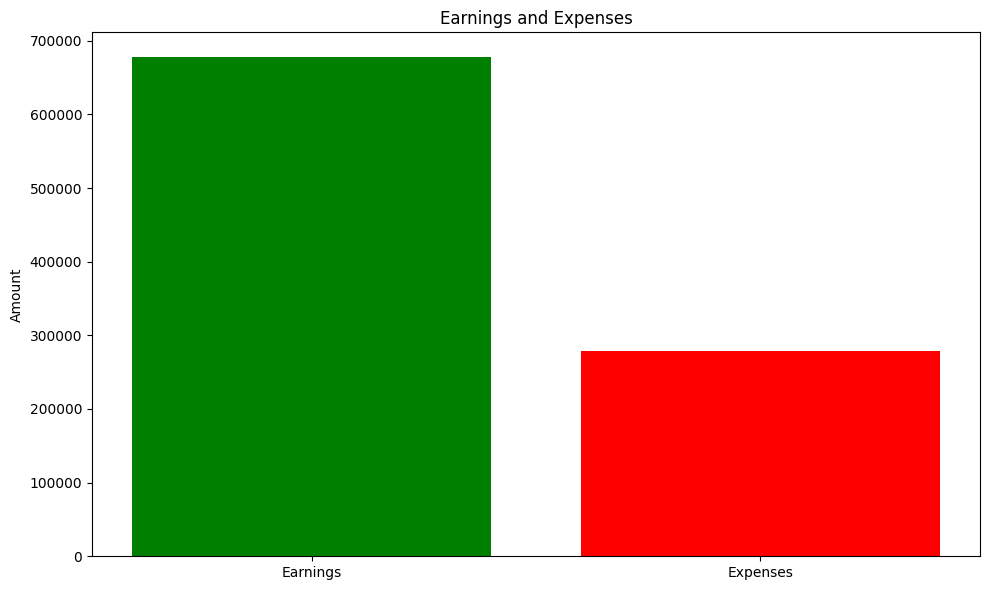

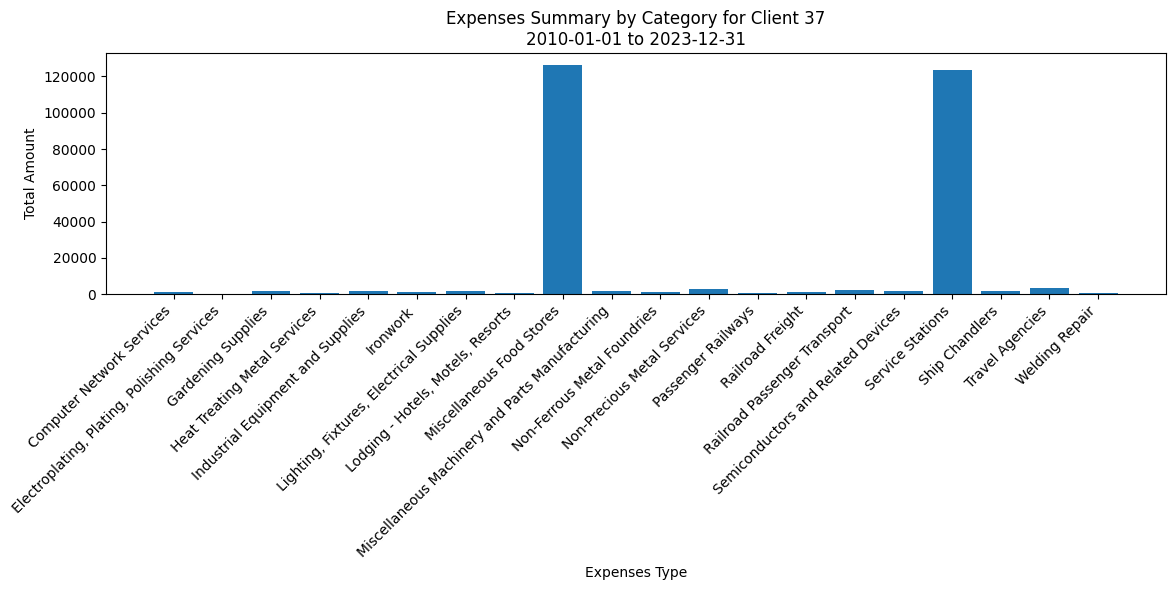

In [3]:
run_agent(sample_data, 37, "Generate a report from 2010-01-01 to 2023-12-31")

In [31]:
def delete_reports():
    if os.path.exists(report_folder):
        shutil.rmtree(report_folder)
    os.mkdir("reports")
    os.mkdir("reports/figures")


def check_all_values(expected_dict, submitted_dict):
    for k in expected_dict:
        if k not in submitted_dict or expected_dict[k] != submitted_dict[k]:
            return False
    return True

def test_agent_1():
    delete_reports()
    input = "Create a pdf report for the fourth month of 2017"
    client_id = 122
    output = {
        "start_date": "2017-04-01",
        "end_date": "2017-04-30",
        "client_id": client_id,
        "create_report": True,
    }
    try:
        submitted_output = run_agent(
            input=input,
            client_id=client_id,
            df=sample_data.copy(deep=True),
        )
    except Exception as e:
        print(e)
        submitted_output = {}

    test_passed = check_all_values(output, submitted_output)
    expected_length = 1 if output["create_report"] else 0
    try:
        pdf_files = [
            file for file in os.listdir(report_folder) if file.endswith(".pdf")
        ]
        condition_pdf = len(pdf_files) == expected_length
    except Exception as e:
        print(e)
        condition_pdf = False
    assert condition_pdf and test_passed


def test_agent_2():
    delete_reports()
    input = "Create a pdf report from 2018-01-01 to 2018-05-31"
    client_id = 1352
    output = {
        "start_date": "2018-01-01",
        "end_date": "2018-05-31",
        "client_id": client_id,
        "create_report": True,
    }
    try:
        submitted_output = run_agent(
            input=input,
            client_id=client_id,
            df=sample_data.copy(deep=True),
        )
    except Exception as e:
        print(e)
        submitted_output = {}

    test_passed = check_all_values(output, submitted_output)
    expected_length = 1 if output["create_report"] else 0
    try:
        pdf_files = [
            file for file in os.listdir(report_folder) if file.endswith(".pdf")
        ]
        condition_pdf = len(pdf_files) == expected_length
    except Exception as e:
        print(e)
        condition_pdf = False
    assert condition_pdf and test_passed


def test_agent_3():
    delete_reports()
    input = "Create a pdf report from 2018-01-01 to 2018-05-31"
    client_id = 7000
    output = {
        "start_date": "2018-01-01",
        "end_date": "2018-05-31",
        "client_id": client_id,
        "create_report": False,
    }
    try:
        submitted_output = run_agent(
            input=input,
            client_id=client_id,
            df=sample_data.copy(deep=True),
        )
    except Exception as e:
        print(e)
        submitted_output = {}

    test_passed = check_all_values(output, submitted_output)
    expected_length = 1 if output["create_report"] else 0
    try:
        pdf_files = [
            file for file in os.listdir(report_folder) if file.endswith(".pdf")
        ]
        condition_pdf = len(pdf_files) == expected_length
    except Exception as e:
        print(e)
        condition_pdf = False
    assert condition_pdf and test_passed

In [33]:
import os
import pandas as pd
import shutil

current_folder = "/Users/computingvictor/Documents/Workspace/hackathon-caixabank-data-ai-report/tests"
parent_folder = os.path.dirname(current_folder)
report_folder = os.path.join(parent_folder, "reports")
data_folder = os.path.join(parent_folder, "data")

In [36]:
test_agent_3()

No hay datos para generar el informe.
